In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('pretty')
import pandas as pd
import h5py
import os
os.getcwd()
df = pd.read_pickle('data/combinedPD_H2.pkl')
df.keys()

Index(['GroupID', 'galnames', 'MBH', 'fedd', 'SFR_x', 'SFRSD_gasR_caesar',
       'SFRSD_gasR_manual', 'gasSD_caesar', 'gasSD_manual', 'r_gas_half_mass',
       'r_stellar_half_mass', 'Zstellar', 'Zmass', 'fgas', 'DGR', 'DTM',
       'Central', 'Mhalo_parent', 'HID', 'zreds', 'N_gal', 'R_gal', 'M_gas',
       'M_star', 'M_GMC', 'M_dense', 'M_dm', 'SFR_y', 'SFRsim', 'SFRsd',
       'Zsfr', 'f_dense', 'mw_age', 'SFRsd_Rhalf', 'L_CII_GMC', 'L_CII_dif',
       'L_CII_DNG', 'L_CII_DIG', 'L_CII', 'L_OI_GMC', 'L_OI_dif', 'L_OI_DNG',
       'L_OI_DIG', 'L_OI', 'L_OIII_88_GMC', 'L_OIII_88_dif', 'L_OIII_88_DNG',
       'L_OIII_88_DIG', 'L_OIII_88', 'L_NII_122_GMC', 'L_NII_122_dif',
       'L_NII_122_DNG', 'L_NII_122_DIG', 'L_NII_122', 'L_NII_205_GMC',
       'L_NII_205_dif', 'L_NII_205_DNG', 'L_NII_205_DIG', 'L_NII_205',
       'L_CI_609_GMC', 'L_CI_609_dif', 'L_CI_609_DNG', 'L_CI_609_DIG',
       'L_CI_609', 'L_CI_369_GMC', 'L_CI_369_dif', 'L_CI_369_DNG',
       'L_CI_369_DIG', 'L_CI_369', 'L_C

In [4]:
np.max(df.M_GMC_H2_cloudy/df.M_dif_H_cloudy)

2.5138695014609787

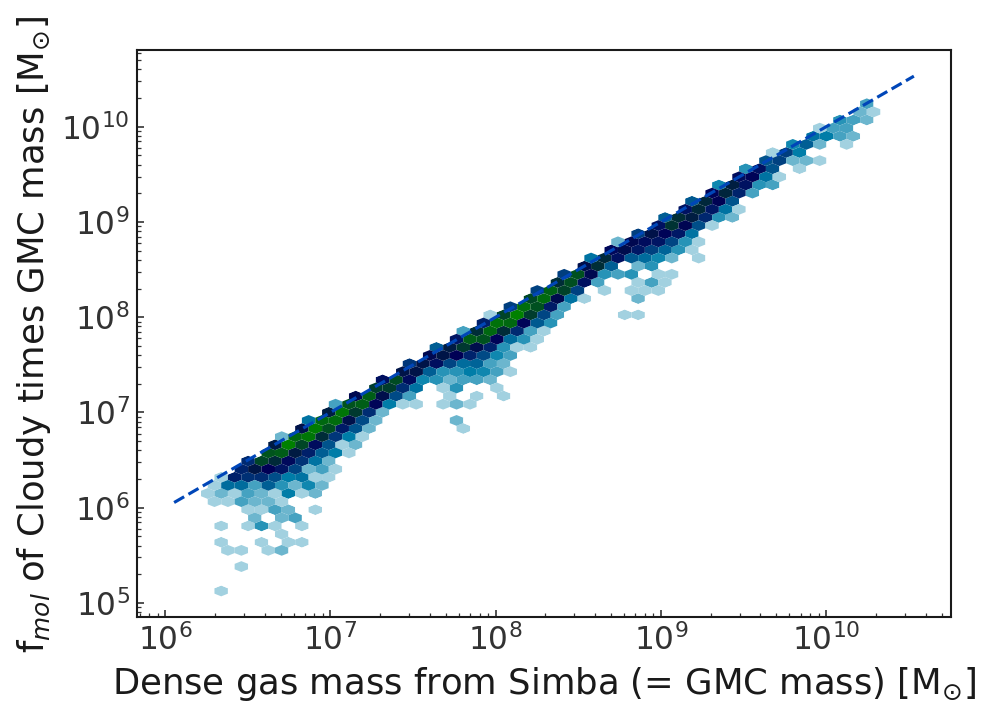

In [7]:
# MOLECULAR MASS COMPARISON OF Simba vs Cloudy
# Dense gas mass from Simba vs f_H2 from Cloudy times GMC mass
fig,ax = plt.subplots()
ax.hexbin(df.M_GMC,df.M_GMC*(df.M_GMC_H2_cloudy/df.M_GMC_H_cloudy)+df.M_dif*(df.M_dif_H2_cloudy/df.M_dif_H_cloudy),\
          gridsize=(50,30),xscale='log',yscale='log',bins='log',cmap='ocean_r',lw=0)
ax.set_ylabel('f$_{mol}$ of Cloudy times GMC mass [M$_{\odot}$]')
ax.set_xlabel('Dense gas mass from Simba (= GMC mass) [M$_{\odot}$]')
ax.plot(ax.get_xlim(),ax.get_xlim(),'--')
plt.savefig('plots/M_mol_Cloudy_vs_Simba',dpi=200)

In [42]:
M_GMC = np.zeros(len(df))
M_GMC_H_cloudy = np.zeros(len(df))
M_dif_H_cloudy = np.zeros(len(df))
for i,galname in enumerate(df.galnames):
    gmcgas = pd.read_hdf('D:\\karen_things\\ISM_data_m2550100_11137/z5.93_%s_GMC.h5' % galname)    
    difgas = pd.read_hdf('D:\\karen_things\\ISM_data_m2550100_11137/z5.93_%s_dif.h5' % galname)  
#     print(gmcgas.keys())
    M_GMC[i] = np.sum(gmcgas.m)
    M_GMC_H_cloudy[i] = np.sum(gmcgas.m_H)
    M_dif_H_cloudy[i] = np.sum(difgas.m_H_DNG) + np.sum(difgas.m_H_DIG)


In [26]:
M_GMC = np.zeros(len(df))
M_GMC_H2_cloudy = np.zeros(len(df))
M_GMC_HI_cloudy = np.zeros(len(df))
M_GMC_HII_cloudy = np.zeros(len(df))
M_dif_H2_cloudy = np.zeros(len(df))
M_dif_HI_cloudy = np.zeros(len(df))
M_dif_HII_cloudy = np.zeros(len(df))
for i,galname in enumerate(df.galnames):
    gmcgas = pd.read_hdf('D:\\karen_things\\ISM_data_m2550100_11137/z5.93_%s_GMC.h5' % galname)    
    difgas = pd.read_hdf('D:\\karen_things\\ISM_data_m2550100_11137/z5.93_%s_dif.h5' % galname)  
    M_GMC[i] = np.sum(gmcgas.m)
    M_GMC_H2_cloudy[i] = np.sum(gmcgas.m_H2)
    M_GMC_HI_cloudy[i] = np.sum(gmcgas.m_HI)
    M_GMC_HII_cloudy[i] = np.sum(gmcgas.m_HII)
    M_dif_H2_cloudy[i] = np.sum(difgas.m_H2_DNG) + np.sum(difgas.m_H2_DIG)
    M_dif_HI_cloudy[i] = np.sum(difgas.m_HI_DNG) + np.sum(difgas.m_HI_DIG)
    M_dif_HII_cloudy[i] = np.sum(difgas.m_HII_DNG) + np.sum(difgas.m_HII_DIG)

In [31]:
df['M_GMC_H2_cloudy'] = M_GMC_H2_cloudy
df['M_GMC_HI_cloudy'] = M_GMC_HI_cloudy
df['M_GMC_HII_cloudy'] = M_GMC_HII_cloudy
df['M_dif_H2_cloudy'] = M_dif_H2_cloudy
df['M_dif_HI_cloudy'] = M_dif_HI_cloudy
df['M_dif_HII_cloudy'] = M_dif_HII_cloudy

In [43]:
df['M_GMC_H_cloudy'] = M_GMC_H_cloudy
df['M_dif_H_cloudy'] = M_dif_H_cloudy

In [44]:
df.to_pickle('data/combinedPD_H2.pkl')

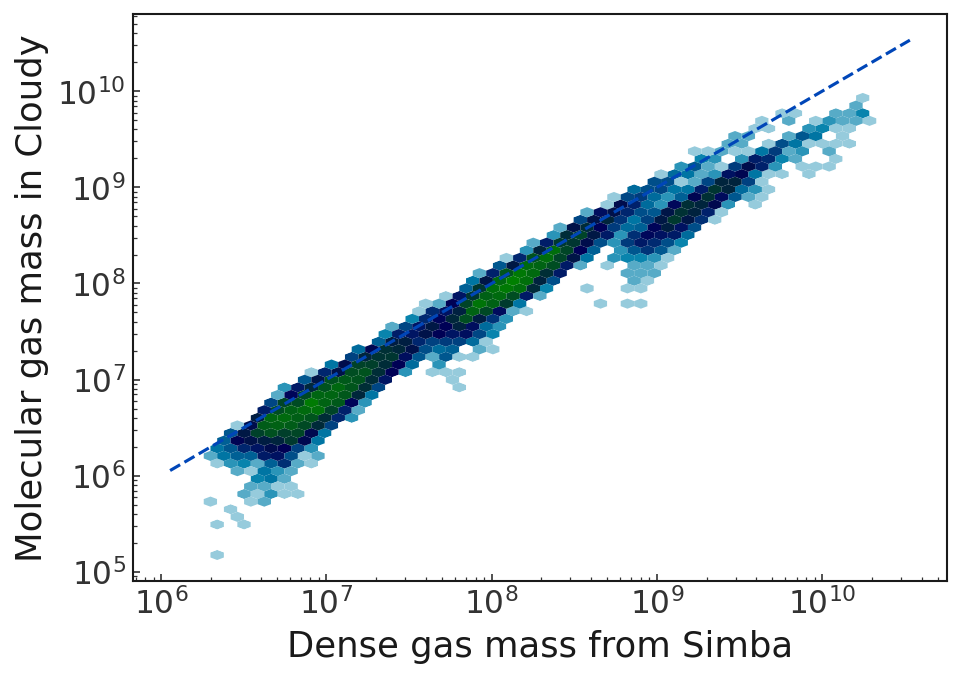

In [39]:
fig,ax = plt.subplots()
ax.hexbin(df.M_GMC,1.25*(df.M_GMC_H2_cloudy+df.M_dif_H2_cloudy),\
          gridsize=(50,30),xscale='log',yscale='log',bins='log',cmap='ocean_r',lw=0)
ax.set_ylabel('Molecular gas mass in Cloudy')
ax.set_xlabel('Dense gas mass from Simba')
ax.plot(ax.get_xlim(),ax.get_xlim(),'--')
plt.savefig('plots/M_mol_Cloudy_vs_Simba',dpi=200)

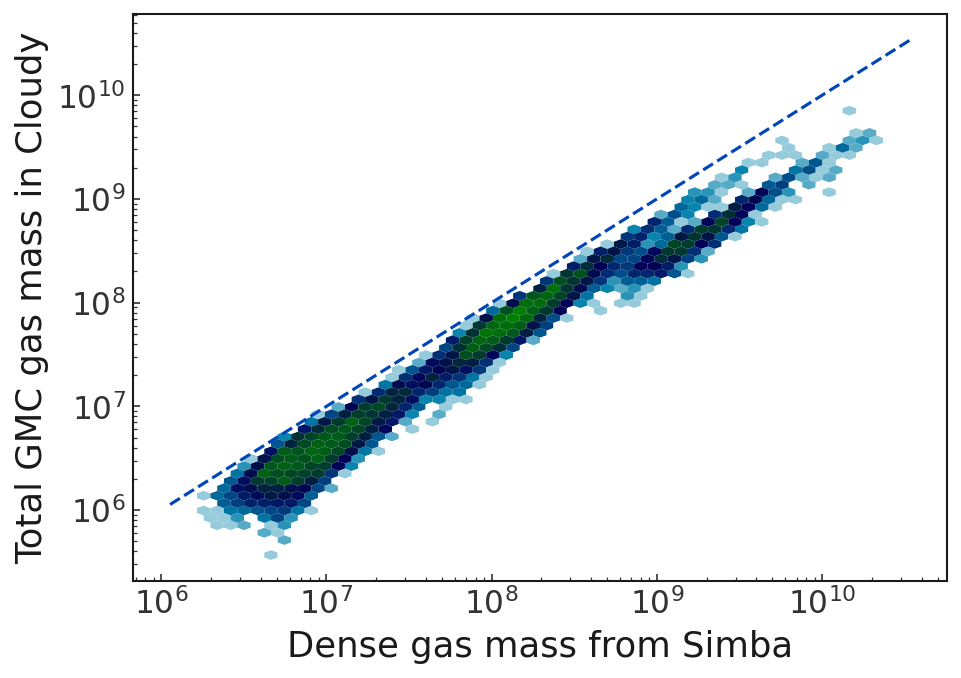

In [40]:
fig,ax = plt.subplots()
ax.hexbin(df.M_GMC,1.25*(df.M_GMC_H2_cloudy+df.M_GMC_HI_cloudy+df.M_GMC_HII_cloudy),\
          gridsize=(50,30),xscale='log',yscale='log',bins='log',cmap='ocean_r',lw=0)
ax.set_ylabel('Total GMC gas mass in Cloudy')
ax.set_xlabel('Dense gas mass from Simba')
ax.plot(ax.get_xlim(),ax.get_xlim(),'--')
plt.savefig('plots/M_GMC_Cloudy_vs_Simba',dpi=200)

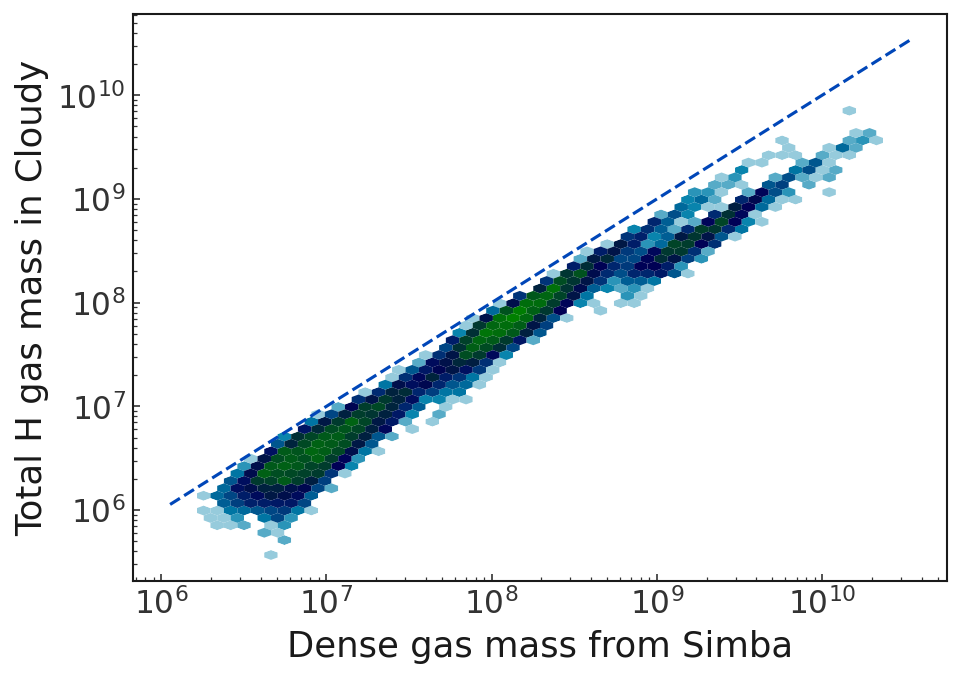

In [46]:
fig,ax = plt.subplots()
ax.hexbin(df.M_GMC,1.25*(df.M_GMC_H_cloudy),\
          gridsize=(50,30),xscale='log',yscale='log',bins='log',cmap='ocean_r',lw=0)
ax.set_ylabel('Total H gas mass in Cloudy')
ax.set_xlabel('Dense gas mass from Simba')
ax.plot(ax.get_xlim(),ax.get_xlim(),'--')
plt.savefig('plots/M_H_Cloudy_vs_Simba',dpi=200)

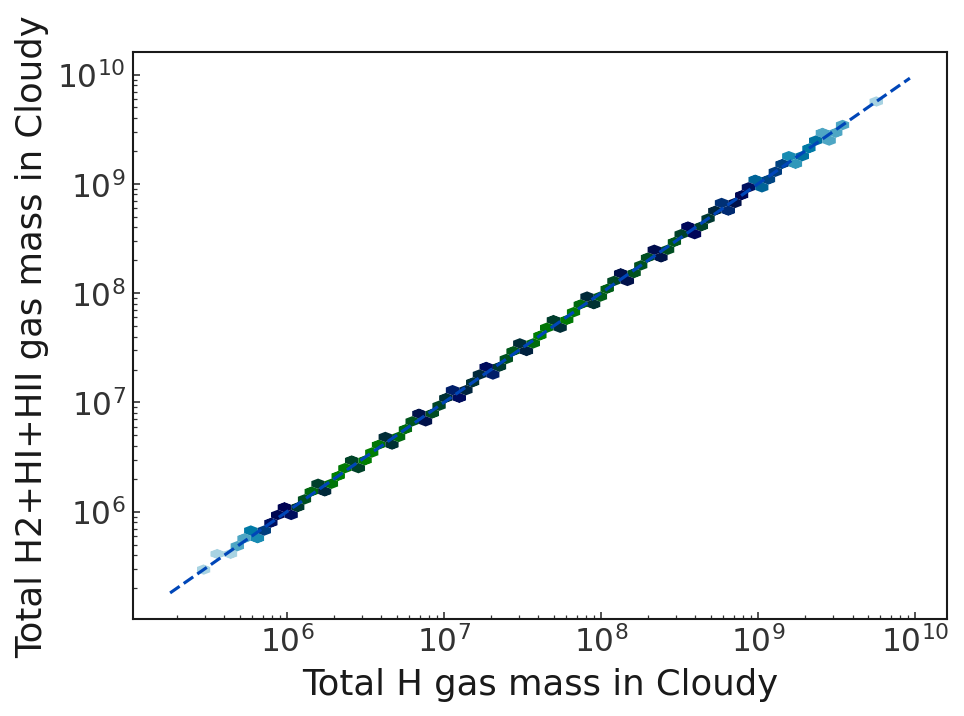

In [45]:
fig,ax = plt.subplots()
ax.hexbin(df.M_GMC_H_cloudy,df.M_GMC_H2_cloudy+df.M_GMC_HI_cloudy+df.M_GMC_HII_cloudy,\
          gridsize=(50,30),xscale='log',yscale='log',bins='log',cmap='ocean_r',lw=0)
ax.set_ylabel('Total H2+HI+HII gas mass in Cloudy')
ax.set_xlabel('Total H gas mass in Cloudy')
ax.plot(ax.get_xlim(),ax.get_xlim(),'--')
plt.savefig('plots/M_H_Cloudy',dpi=200)

In [78]:
# fig,ax = plt.subplots()
np.sum(gmcgas.f_H2*gmcgas.m)/np.sum(gmcgas.m) 
np.sum(gmcgas['m_H2'])/np.sum(gmcgas['m_H'])
np.sum(gmcgas['m_HI'])/np.sum(gmcgas['m_H'])
np.sum(gmcgas['m_HII'])/np.sum(gmcgas['m_H'])
print(np.sum(gmcgas['m_HI']))
print(df.M_GMC_HI_cloudy[i])
print(df.M_GMC_H2_cloudy[i])
print(df.M_GMC_H_cloudy[i])

77988099.30024491
77530973.58344376
137912564.1482057
215487224.18771142


In [8]:
len(gmcgas[gmcgas.P_ext == 0])

22

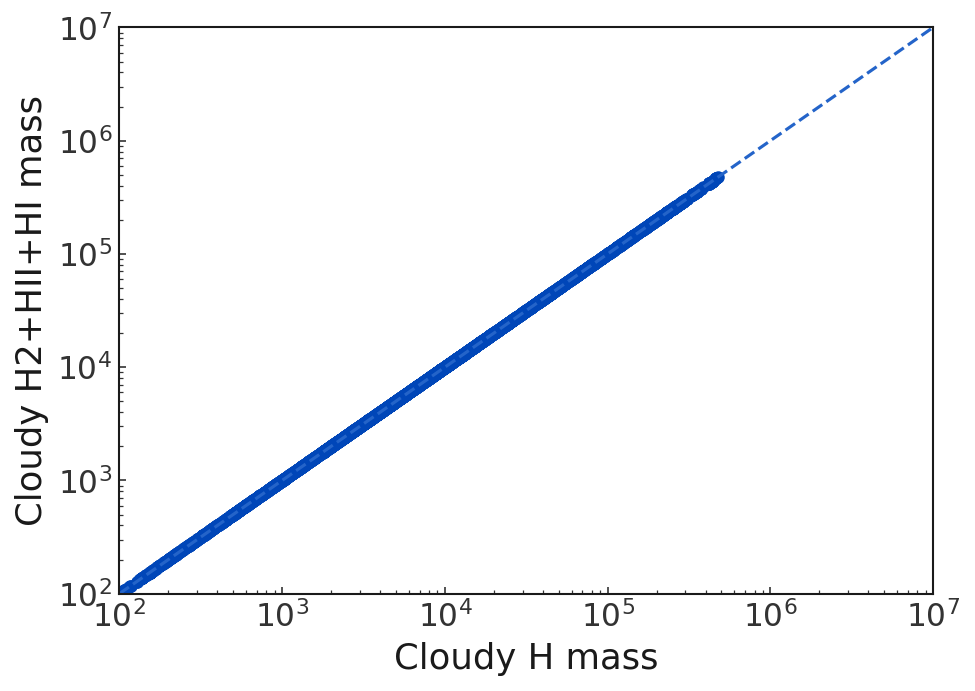

In [17]:
# ONE GALAXY
galname = df.galnames[11000]
gmcgas = pd.read_hdf('D:\\karen_things\\ISM_data_m2550100_11137/z5.93_%s_GMC.h5' % galname)   
gmcgas = gmcgas[gmcgas.P_ext > 0].reset_index(drop=True)
fig,ax = plt.subplots()
ax.plot(gmcgas.m_H.values,gmcgas.m_HI.values+gmcgas.m_HII.values+gmcgas.m_H2.values,'o')#,mew=2,ms=4)
ax.set_ylim([1e2,1e7])
ax.set_xlim([1e2,1e7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Cloudy H mass')
ax.set_ylabel('Cloudy H2+HII+HI mass')
ax.plot(ax.get_xlim(),ax.get_xlim(),'--')
m_H = gmcgas.m_H
len(m_H[m_H == 0])
plt.savefig('plots/m_H_one_galaxy',dpi=200)

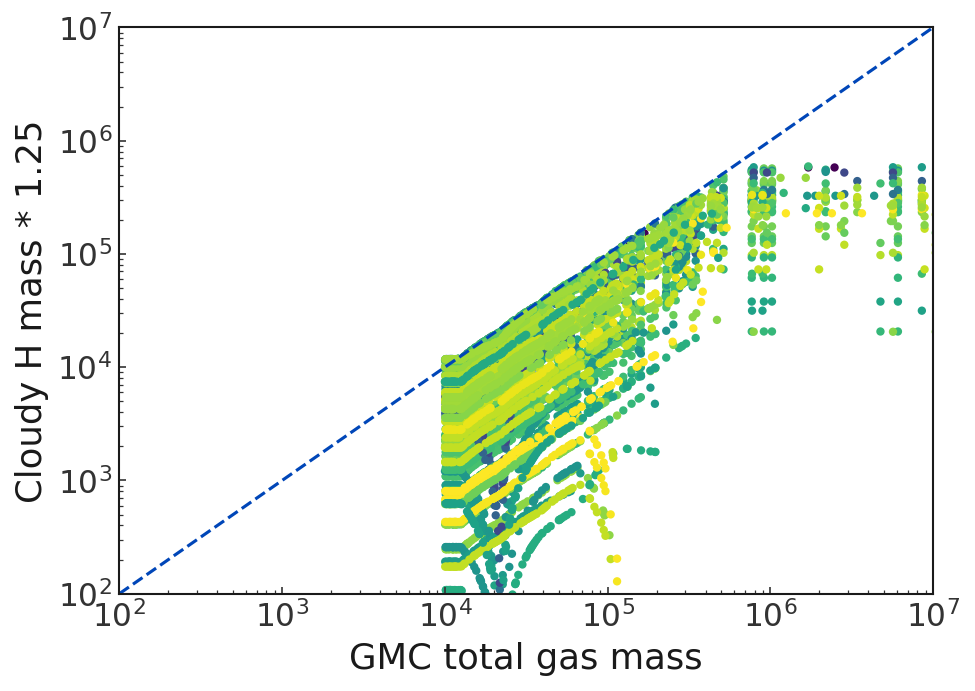

In [18]:
# ONE GALAXY
galname = df.galnames[11000]
gmcgas = pd.read_hdf('D:\\karen_things\\ISM_data_m2550100_11137/z5.93_%s_GMC.h5' % galname)   
gmcgas = gmcgas[gmcgas.P_ext > 0].reset_index(drop=True)
fig,ax = plt.subplots()
ax.scatter(gmcgas.m.values,1.25*gmcgas.m_H.values,c=np.log10(gmcgas.P_ext))#,mew=2,ms=4)
ax.set_ylim([1e2,1e7])
ax.set_xlim([1e2,1e7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('GMC total gas mass')
ax.set_ylabel('Cloudy H mass * 1.25')
ax.plot(ax.get_xlim(),ax.get_xlim(),'--')
m_H = gmcgas.m_H
len(m_H[m_H == 0])
plt.savefig('plots/m_H_one_galaxy_Pext',dpi=200)

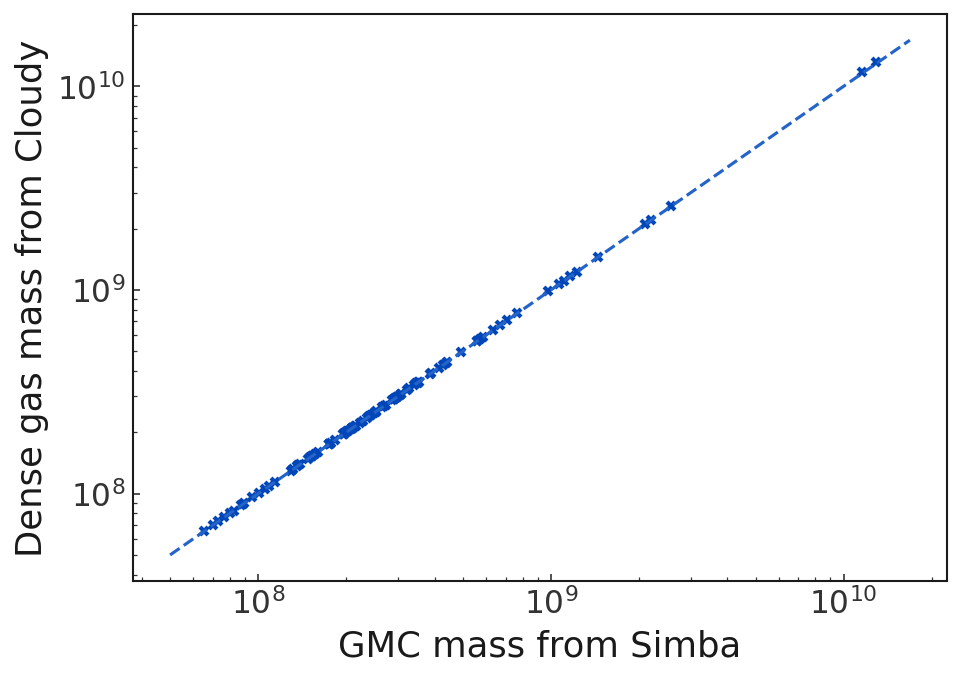

In [9]:
fig,ax = plt.subplots()
ax.plot(df.M_GMC[0:100],df.M_dense[0:100],'x',mew=2,ms=4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Dense gas mass from Cloudy')
ax.set_xlabel('GMC mass from Simba')
# ax.set_xlim([])
ax.plot(ax.get_xlim(),ax.get_xlim(),'--')

In [19]:
10.**-0.6

0.251188643150958